# Explore here

It's recommended to use this notebook for exploration purposes.

In [2]:
pip install pandas requests lxml

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#2

import requests
import pandas

url = "https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify"
resposta = requests.get(url)
html = resposta.text  
print(html)
print("Status:", resposta.status_code)


<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>List of Spotify streaming records - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-

In [17]:
#3
from bs4 import BeautifulSoup
import requests
import pandas as pd

url = "https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify"
html = requests.get(url).text
sopa = BeautifulSoup(html, 'lxml')
tabela = sopa.find('table', {'class': 'wikitable sortable'})
df = pd.read_html(str(tabela))[0]
print(df.columns)
df.head()




Index(['No.', 'Song', 'Artist(s)', 'Streams (billions)', 'Release date',
       'Date achieved', 'Days held', 'Ref.', 'Notes'],
      dtype='object')


/tmp/ipykernel_1948/2191200153.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tabela))[0]


,No.,Song,Artist(s),Streams (billions),Release date,Date achieved,Days held,Ref.,Notes
0,9,"""Blinding Lights""",The Weeknd,4.854,29 November 2019,1 January 2023,904,[101],NaN
1,8,"""Shape of You""",Ed Sheeran,1.318,6 January 2017,21 September 2017,1928,[102],NaN
2,7,"""One Dance""",Drake featuring Wizkid and Kyla,0.882,5 April 2016,18 October 2016,338,[103],NaN
3,6,"""Lean On""",Major Lazer featuring MØ and DJ Snake,0.526,2 March 2015,11 November 2015,342,[104],NaN
4,5,"""Thinking out Loud""",Ed Sheeran,0.355,21 June 2014,22 May 2015,173,[105],NaN


In [16]:
#4
import pandas as pd
url = "https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify"
tabela = pd.read_html(url)
df = tabela[0]
print(df.shape)

df_limpo = df.copy()
for col in df_limpo.columns:
    if df_limpo[col].dtype == object:
        df_limpo[col] = df_limpo[col].str.replace(r'[\$B]', '', regex=True).str.strip()

df_limpo['Streams (billions)'] = pd.to_numeric(df_limpo['Streams (billions)'], errors='coerce')
required = ['Song', 'Artist(s)', 'Streams (billions)']
df_limpo = df_limpo.dropna(subset=required)

df_limpo = df_limpo.reset_index(drop=True)
print(df_limpo.shape)
df_limpo.head()

(101, 6)
(100, 6)


,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
0,1,"""linding Lights""",The Weeknd,4.892,29 November 2019,[2]
1,2,"""Shape of You""",Ed Sheeran,4.416,6 January 2017,[3]
2,3,"""Starboy""",The Weeknd and Daft Punk,3.951,21 September 2016,[4]
3,4,"""Someone You Loved""",Lewis Capaldi,3.943,8 November 2018,[5]
4,5,"""As It Was""",Harry Styles,3.931,1 April 2022,[6]


In [11]:
#5
import sqlite3
import pandas as pd

conn = sqlite3.connect("spotify_songs.db")
df_limpo = df.copy()
for col in df_limpo.columns:
    if df_limpo[col].dtype == object:
        df_limpo[col] = df_limpo[col].str.replace(r'[\$B]', '', regex=True).str.strip()

df_limpo['Streams (billions)'] = pd.to_numeric(df_limpo['Streams (billions)'], errors='coerce')
required = ['Song', 'Artist(s)', 'Streams (billions)']
df_limpo = df_limpo.dropna(subset=required)

df_limpo = df_limpo.reset_index(drop=True)
df_limpo.to_sql(name="top_songs", con=conn, if_exists="replace", index=False)
cursor = conn.cursor()
cursor.execute("SELECT COUNT(*) FROM top_songs")
resultado = cursor.fetchone()
print("Número de lineas inseridas:", resultado[0])
conn.close()

Número de lineas inseridas: 100


Index(['Rank', 'Song', 'Artist(s)', 'Streams (billions)', 'Release date',
       'Ref.'],
      dtype='object')


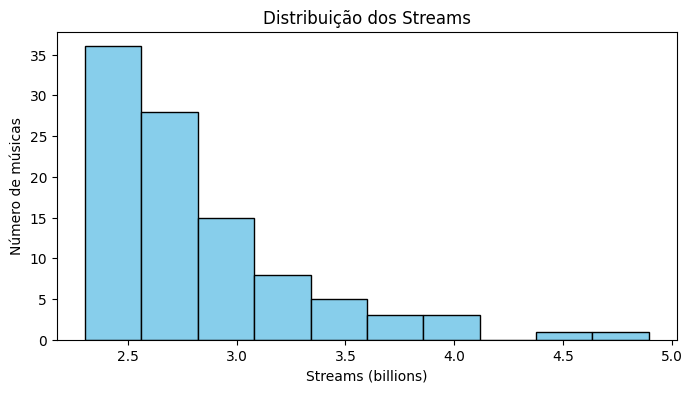

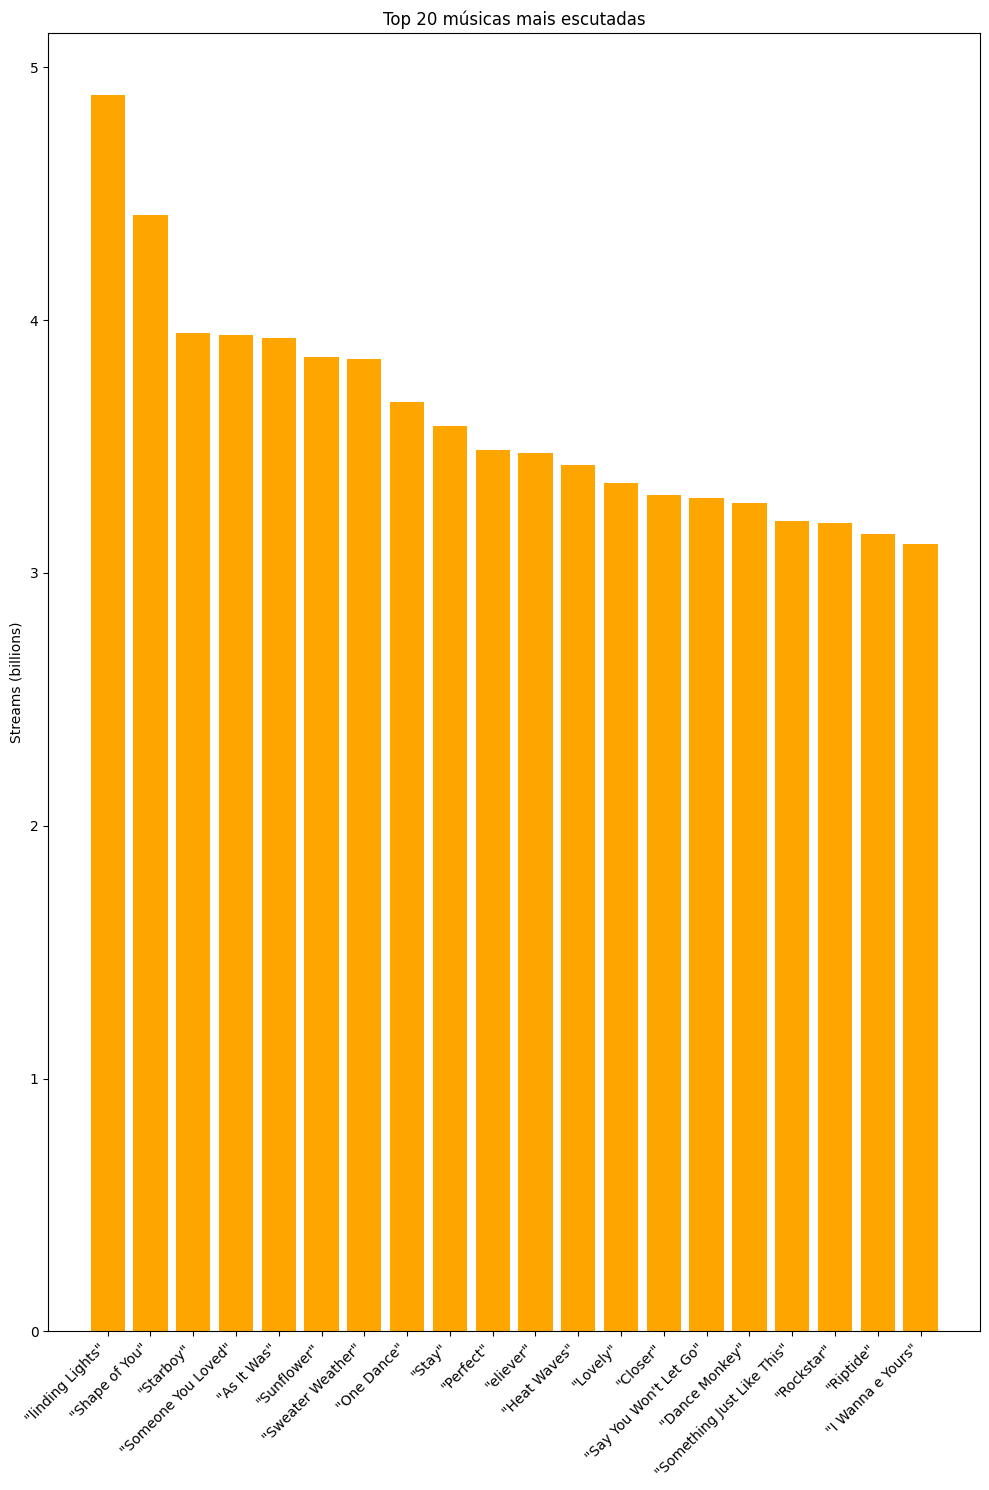

Text(0.5, 1.0, 'Top 5 artistas com mais músicas no ranking')

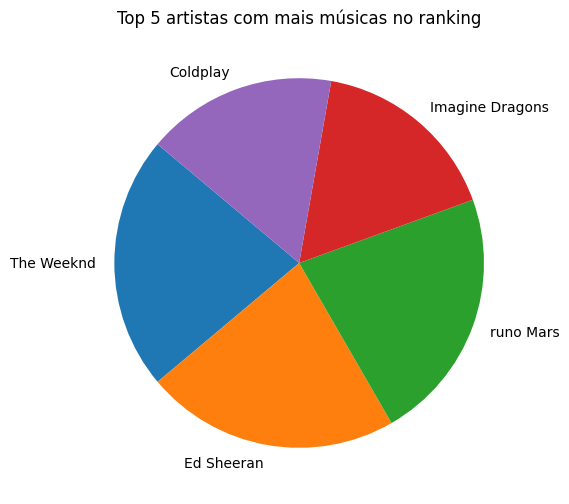

In [14]:
#6
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('spotify_songs.db')
df = pd.read_sql_query('SELECT * FROM top_songs', conn)
conn.close()

print(df.columns)

#Distribuição de Streams (biliões)

plt.figure(figsize=(8, 4))
plt.hist(df["Streams (billions)"], bins=10, color="skyblue", edgecolor="black")
plt.xlabel("Streams (billions)")
plt.ylabel("Número de músicas")
plt.title("Distribuição dos Streams")
plt.show()


#Top 20 músicas mais ouvidas
top20 = df.sort_values(by="Streams (billions)", ascending=False).head(20)

plt.figure(figsize=(10, 15))
plt.bar(top20["Song"], top20["Streams (billions)"], color="orange")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Streams (billions)")
plt.title("Top 20 músicas mais escutadas")
plt.tight_layout()
plt.show()

# Contar quantas músicas cada artista tem no top
top_artistas = df["Artist(s)"].value_counts().head(5)

plt.figure(figsize=(6, 6))
plt.pie(top_artistas, labels=top_artistas.index, startangle=140)
plt.title("Top 5 artistas com mais músicas no ranking")

